In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.cbook import boxplot_stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [81]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

### Датасет заболеваемости диабетом

In [82]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [83]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [84]:
df.shape

(100000, 9)

In [85]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [86]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [88]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Значения переменных

In [89]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [90]:
df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [44]:
num_cols = df.select_dtypes(exclude='object')
num_cols.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [45]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [46]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
    df.head()  

In [47]:
cat_cols.describe()

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [78]:
df['gender'].value_counts()

0    58552
1    41430
2       18
Name: gender, dtype: int64

#### Графики сравнения

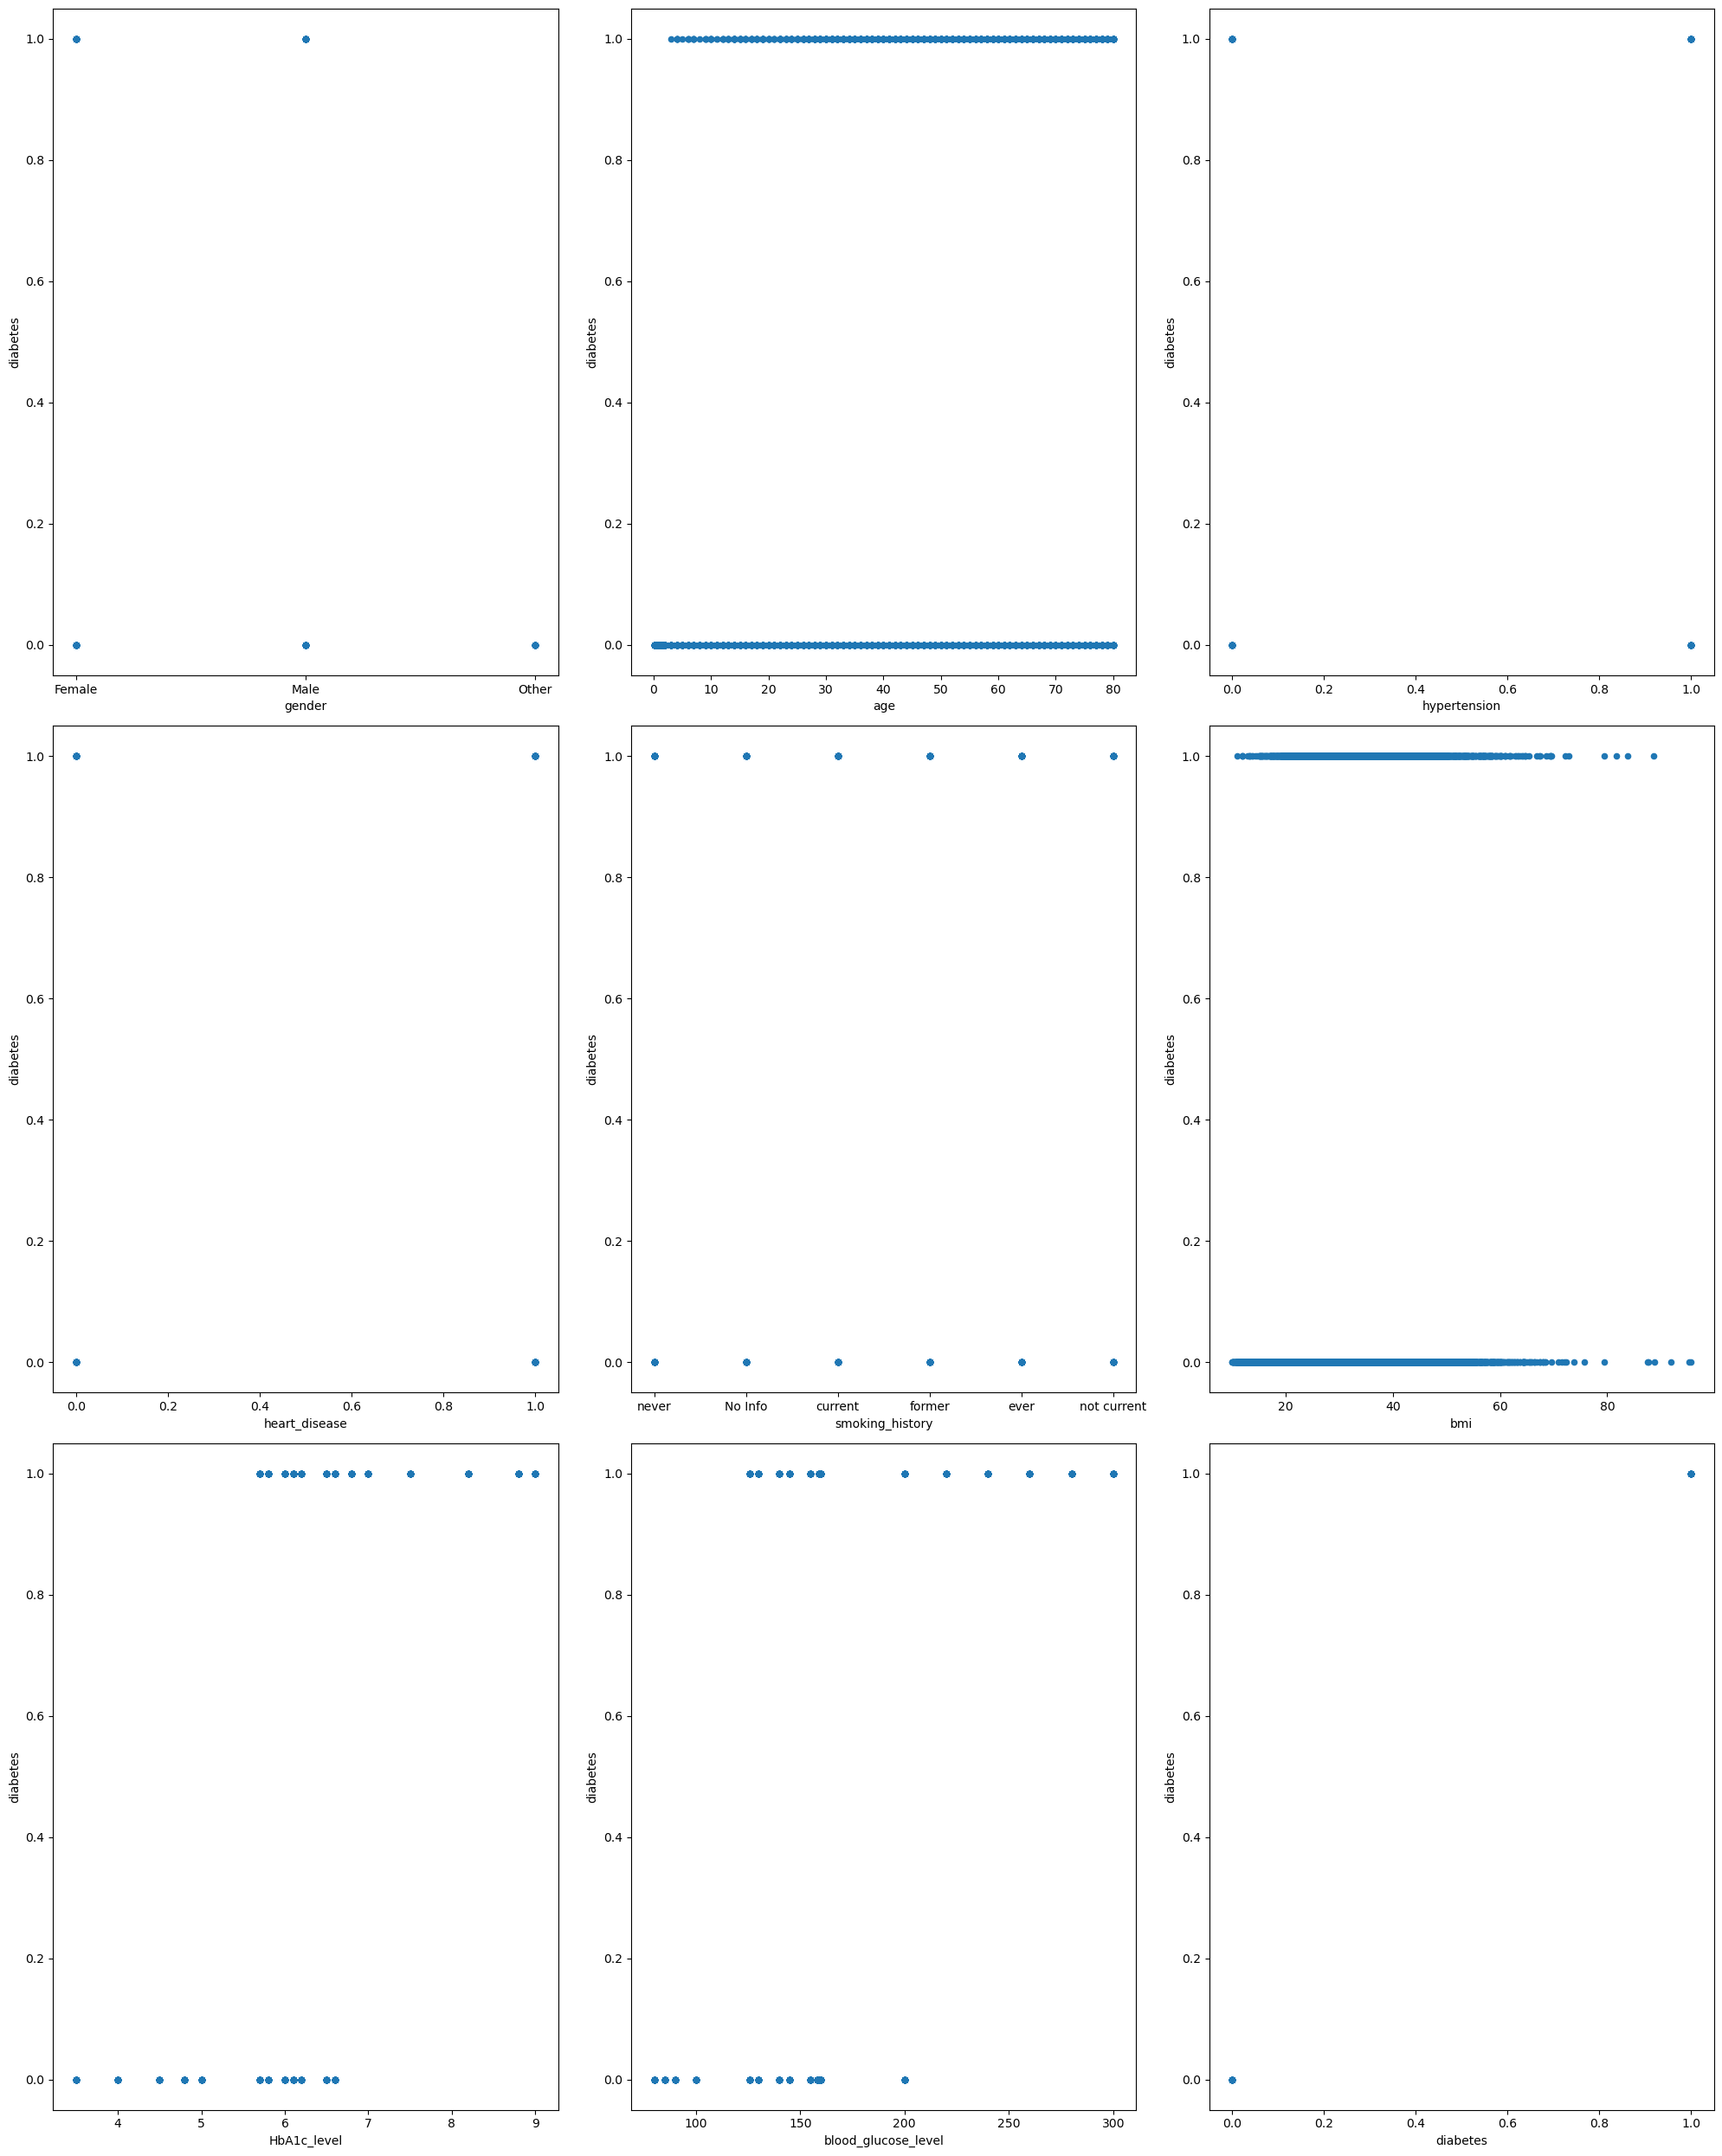

In [97]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,25))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "diabetes", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])
plt.tight_layout()

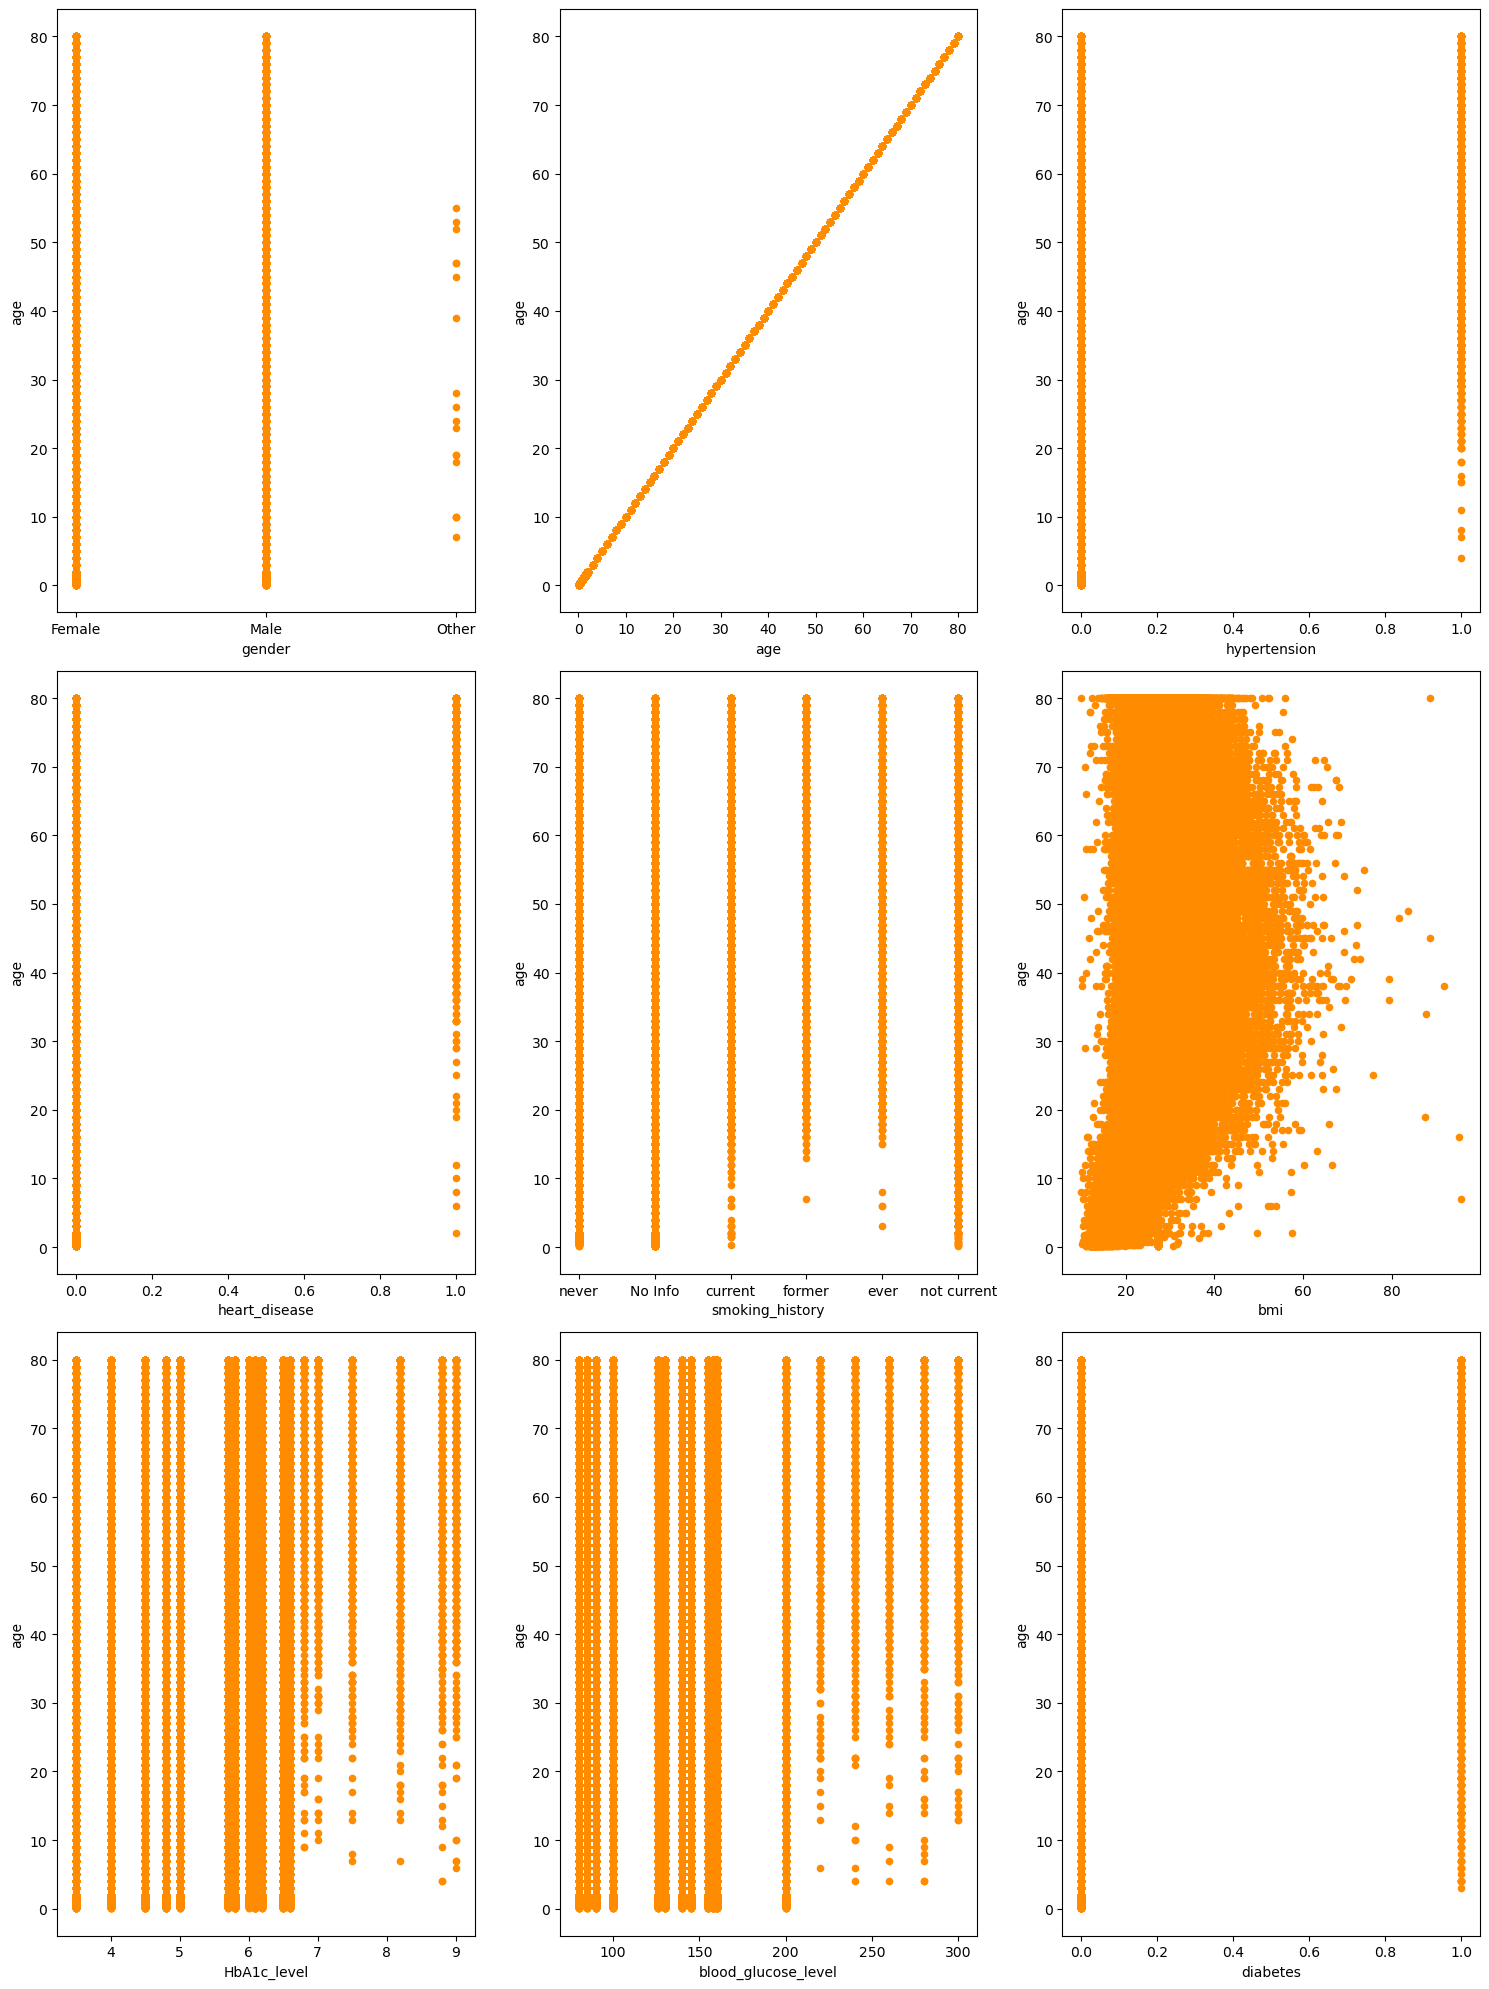

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "age", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3], color='darkorange')
plt.tight_layout()

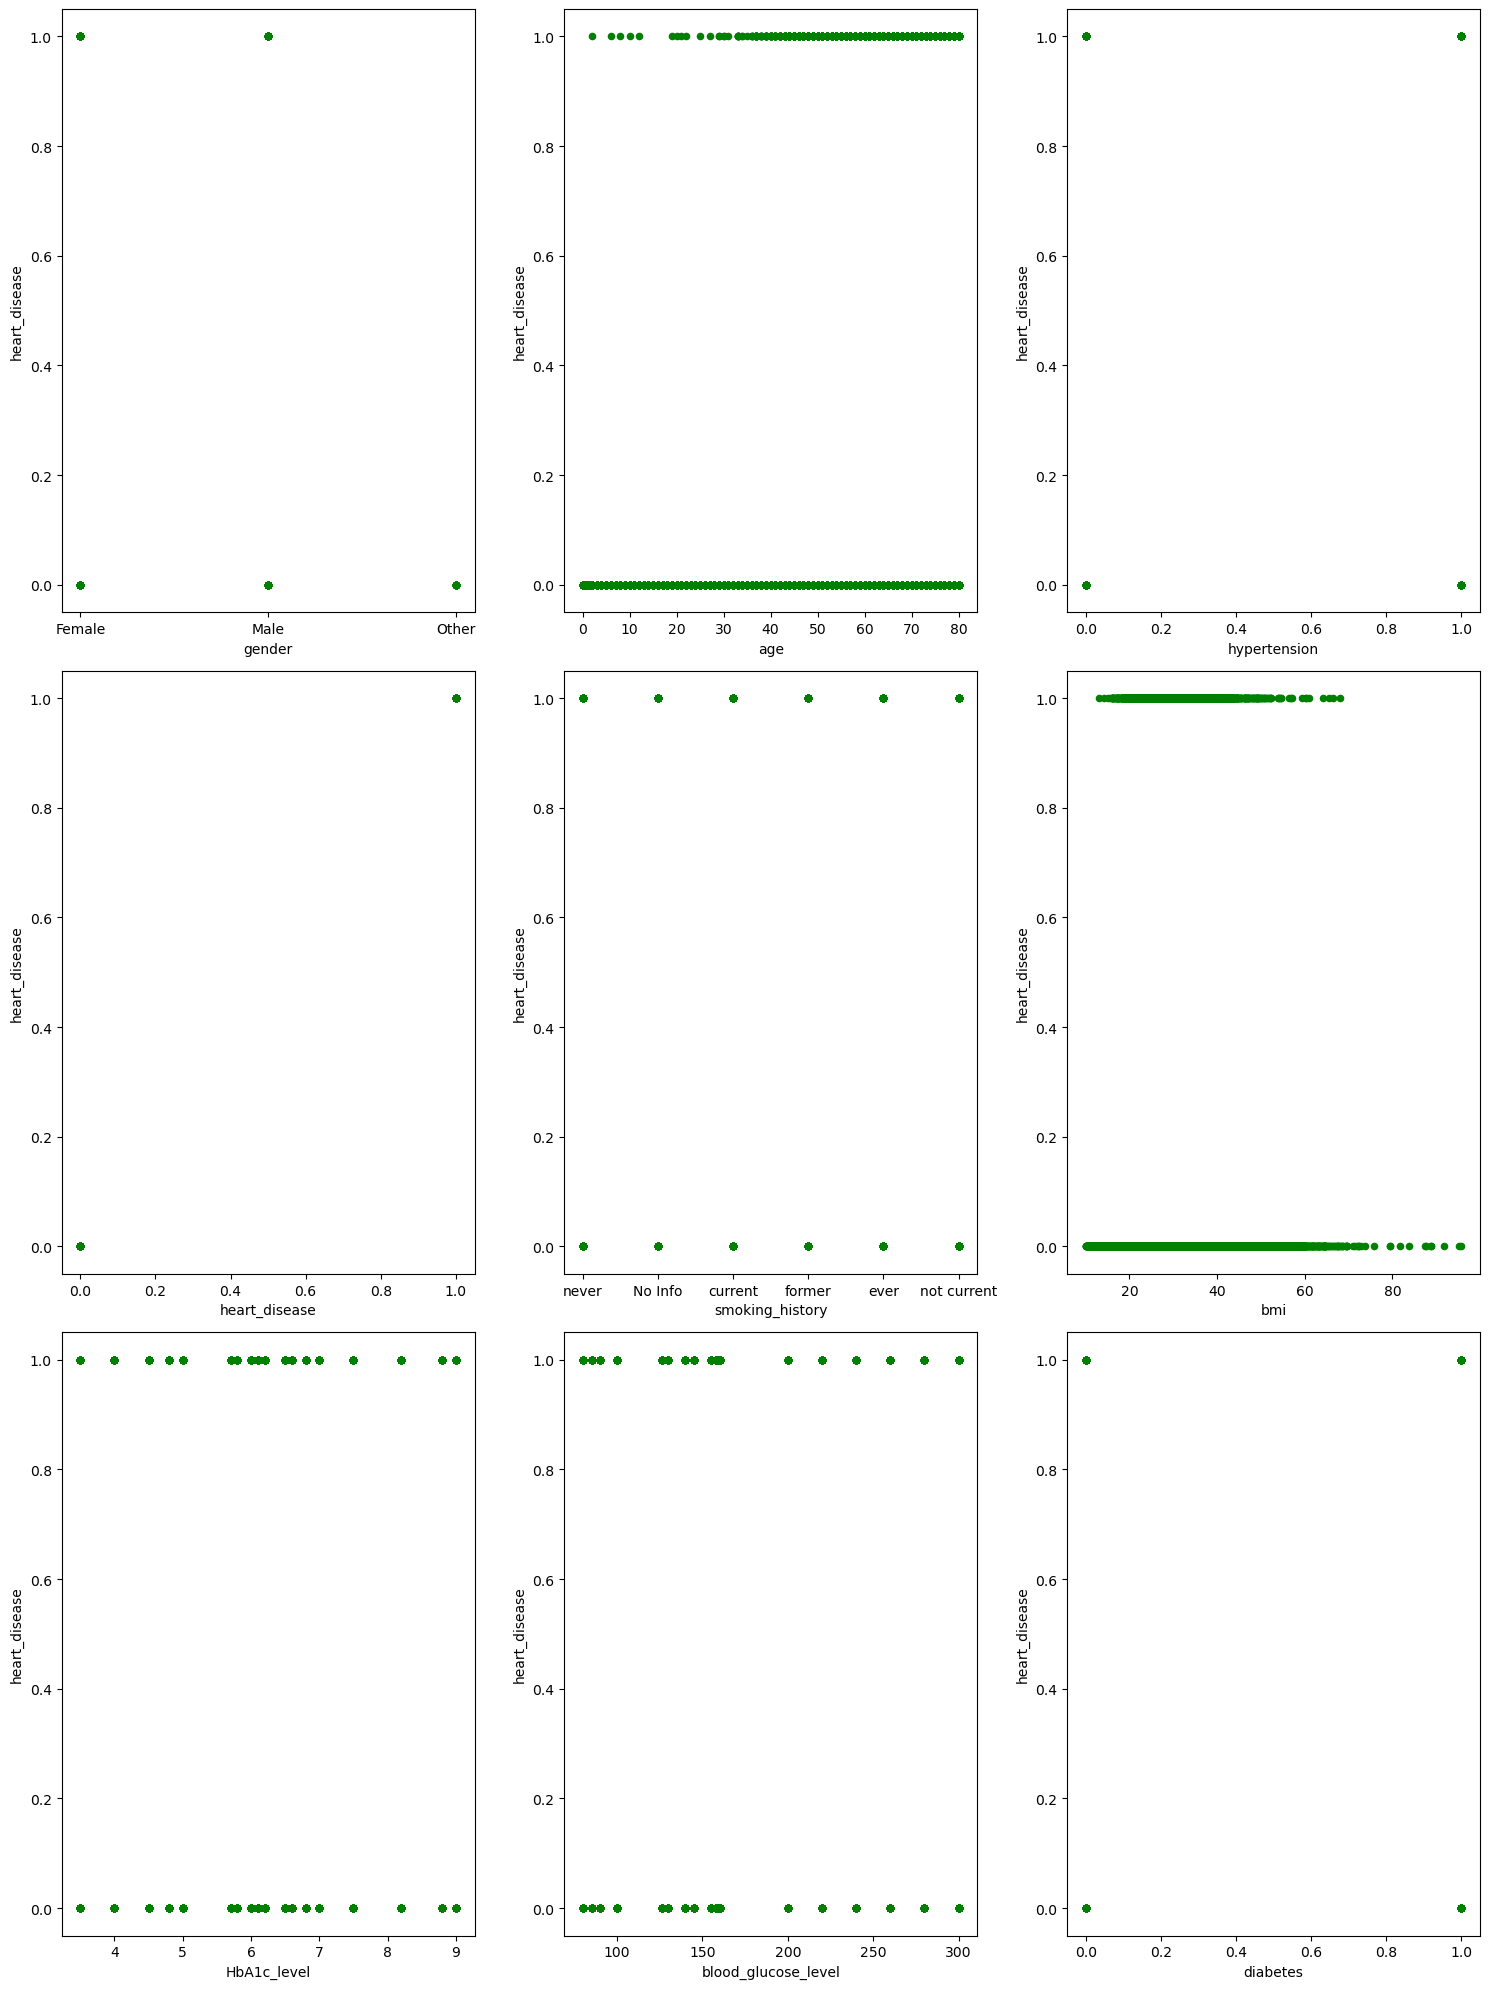

In [154]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "heart_disease", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3], color='g')
plt.tight_layout()

In [112]:
num_cols.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

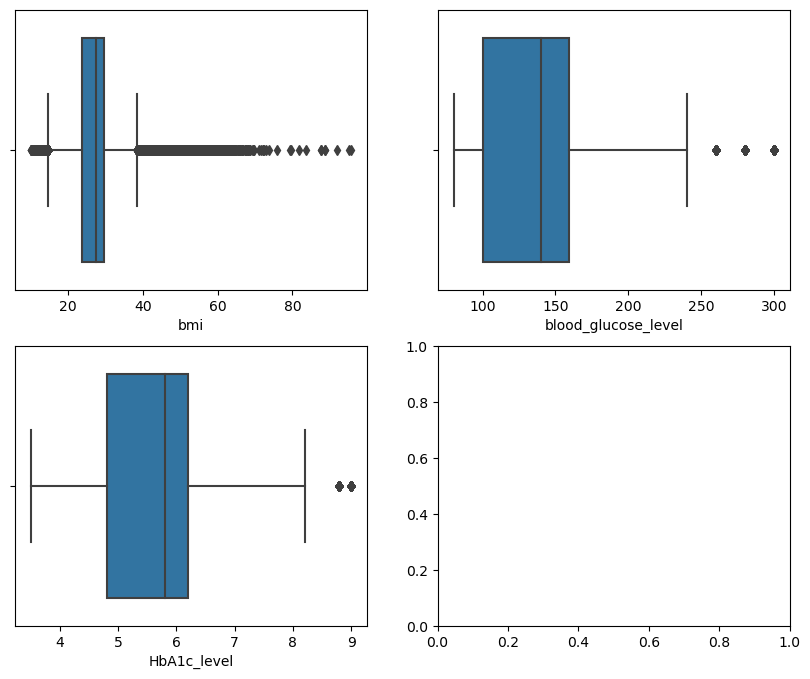

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
count = 0
for idx, feature in enumerate(num_cols.columns[3:-1]):
    sns.boxplot(x=df[feature], ax=axes[count % 2, count // 2])
    count += 1

In [135]:
for col in num_cols.columns[3:-1]:    
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for bmi column: [13.99 14.43 13.79 ... 60.52 45.15 40.69]

Outliers for HbA1c_level column: [9.  9.  8.8 ... 9.  9.  8.8]

Outliers for blood_glucose_level column: [260 300 280 ... 300 300 280]



C:\Users\Arina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='blood_glucose_level', ylabel='Density'>

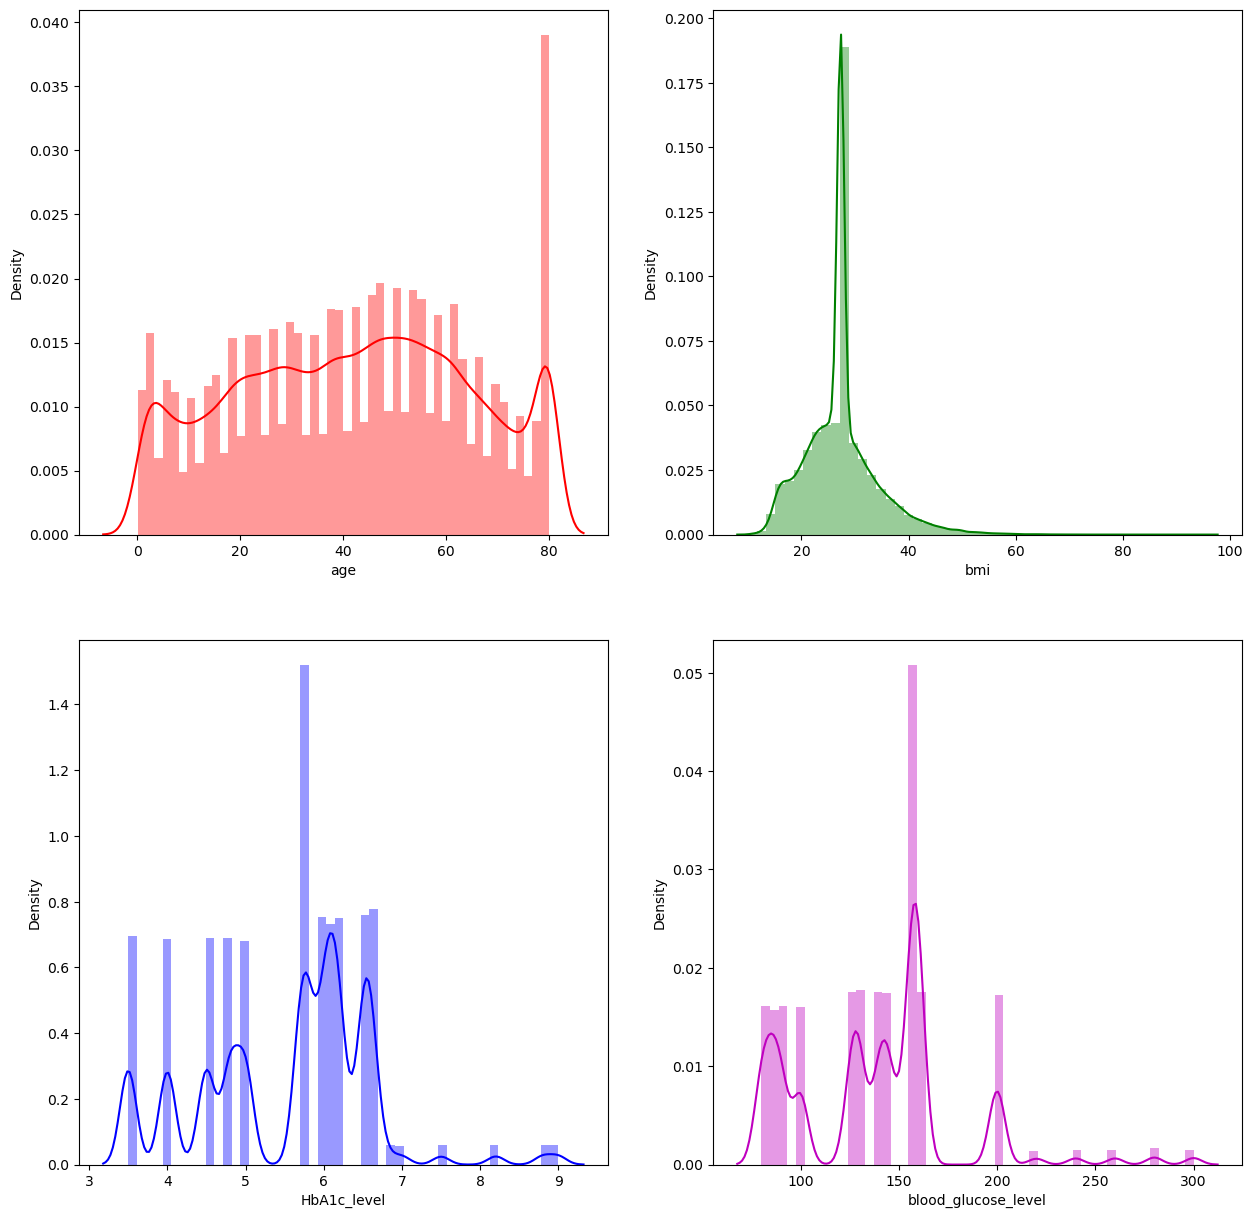

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.distplot(df['age'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['bmi'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['HbA1c_level'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df['blood_glucose_level'], bins=50, color='m', ax=axes[1, 1])

<AxesSubplot:xlabel='HbA1c_level', ylabel='blood_glucose_level'>

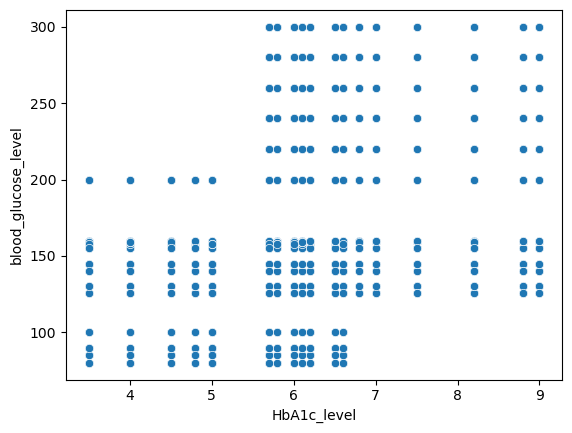

In [143]:
sns.scatterplot(data = df, x = 'HbA1c_level', y = 'blood_glucose_level')

<AxesSubplot:xlabel='age', ylabel='Count'>

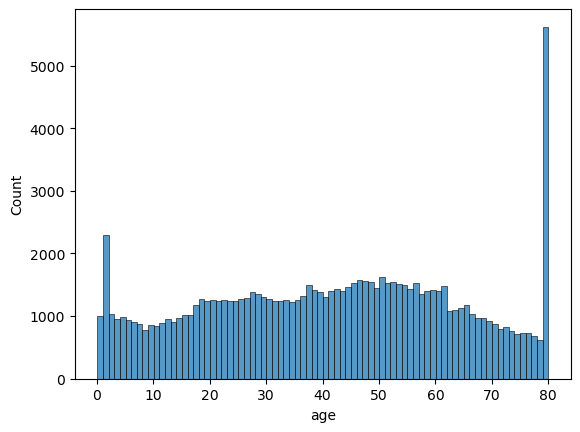

In [150]:
sns.histplot(data = df, x ='age', bins = 80)

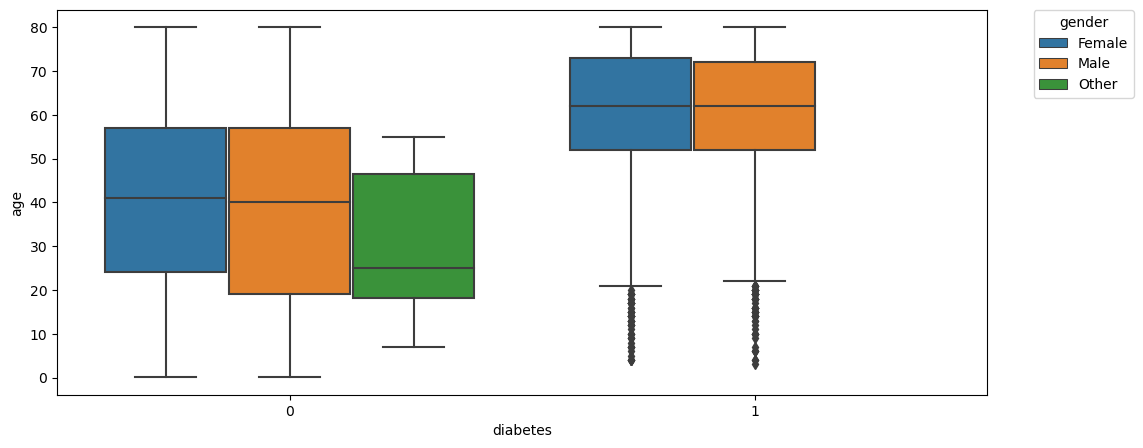

In [153]:
plt.figure(figsize=(12,5))

sns.boxplot(x='diabetes',y='age',data = df,hue='gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='gender')

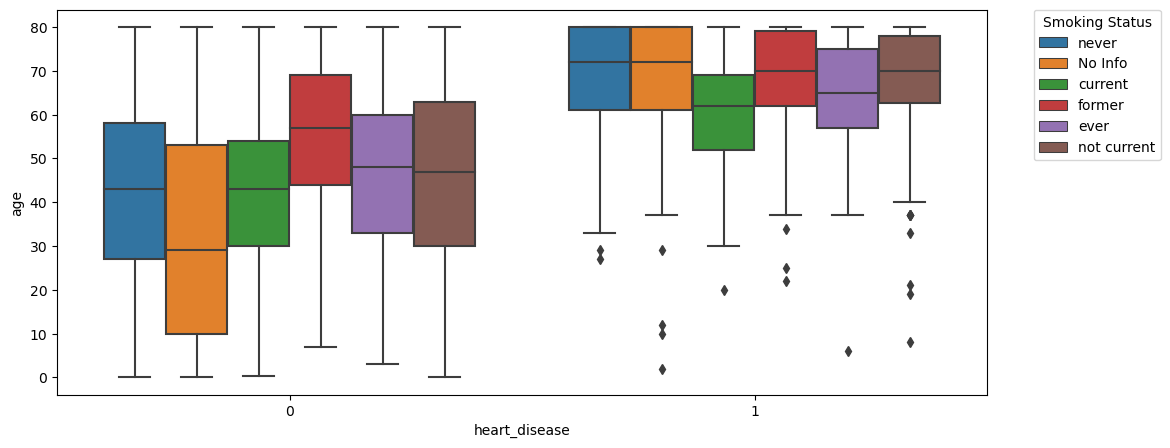

In [159]:
plt.figure(figsize=(12,5))

sns.boxplot(x='heart_disease',y='age',data = df,hue='smoking_history')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Smoking Status')

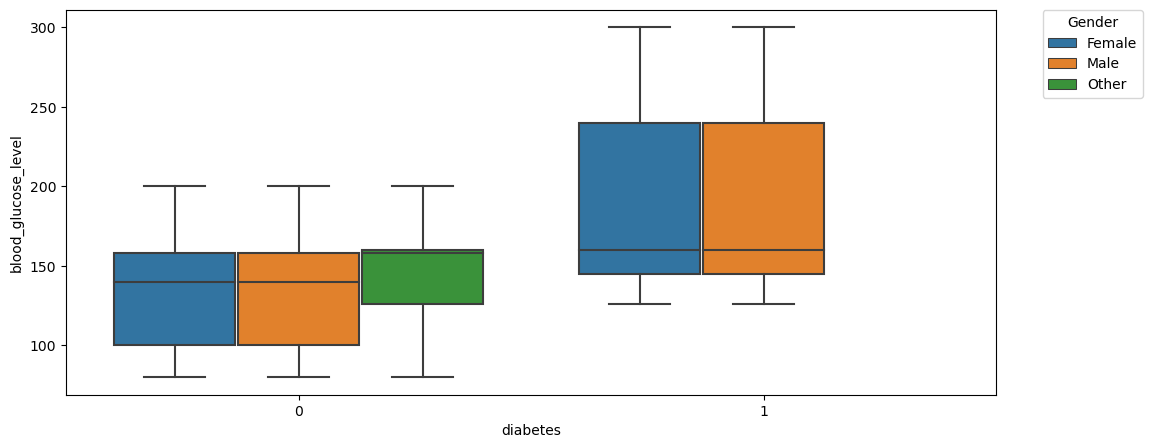

In [162]:
plt.figure(figsize=(12,5))

sns.boxplot(x='diabetes',y='blood_glucose_level',data = df,hue='gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Gender')

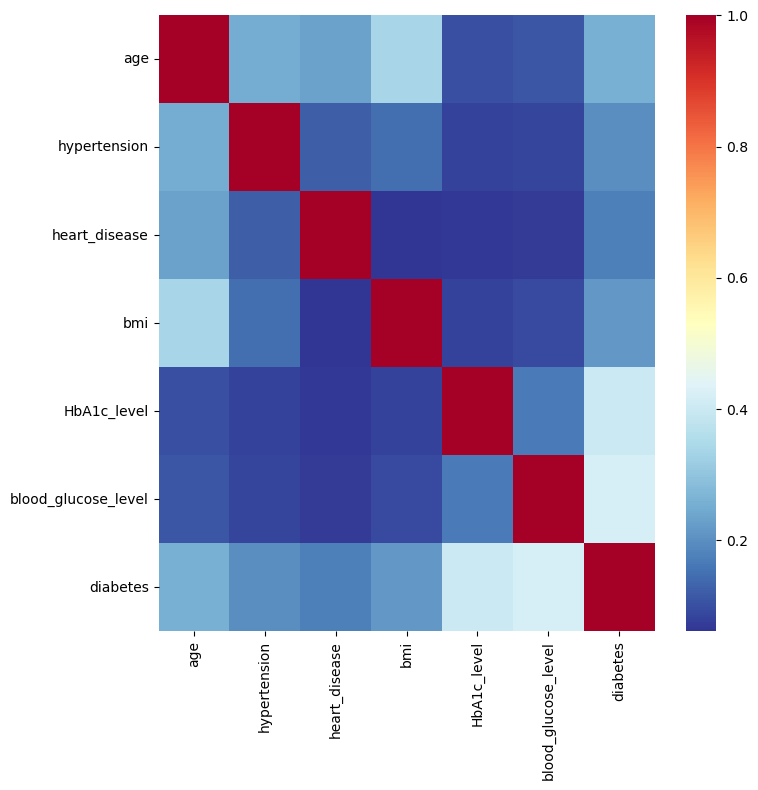

In [164]:
plt.figure(figsize=(8,8))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

In [170]:
num_cols_pca = num_cols[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [172]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols_pca)

In [173]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [ ]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

In [ ]:
draw_3d(df_pca_3)